In [1]:
import os
import shutil
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from git import Repo
from io import BytesIO
from PIL import Image
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

In [2]:
# Clone the Github repository
repo_url = 'https://github.com/Ansuman21/Project-3-Neural-Networks'
repo_dir = 'Project-3-Neural-Networks'  # Directory where repository will be cloned

if not os.path.exists(repo_dir):
    os.makedirs(repo_dir)
    Repo.clone_from(repo_url, repo_dir)

# Define directories
lightning_dir = os.path.join(repo_dir, 'lightning')
rain_dir = os.path.join(repo_dir, 'rain')
snow_dir = os.path.join(repo_dir, 'snow')

# Check if directories exist, if not create them
if not os.path.exists(lightning_dir):
    os.makedirs(lightning_dir)
if not os.path.exists(rain_dir):
    os.makedirs(rain_dir)
if not os.path.exists(snow_dir):
    os.makedirs(snow_dir)

# Load images from GitHub URLs
def load_images_from_github(url, target_dir):
    response = requests.get(url)
    if response.status_code == 200:
        for file_info in response.json():
            filename = file_info['name']
            img_url = file_info['download_url']
            img_response = requests.get(img_url)
            if img_response.status_code == 200:
                img = Image.open(BytesIO(img_response.content))
                # Convert image to RGB mode
                img = img.convert('RGB')
                img.save(os.path.join(target_dir, filename))
            else:
                print(f"Failed to fetch image from URL: {img_url}")
    else:
        print(f"Failed to fetch data from URL: {url}")

In [3]:
# GitHub URLs for the datasets
lightning_url = f"https://api.github.com/repos/Ansuman21/Project-3-Neural-Networks/contents/lightning"
rain_url = f"https://api.github.com/repos/Ansuman21/Project-3-Neural-Networks/contents/rain"
snow_url = f"https://api.github.com/repos/Ansuman21/Project-3-Neural-Networks/contents/snow"

# Load images from GitHub URLs for each dataset
load_images_from_github(lightning_url, lightning_dir)
load_images_from_github(rain_url, rain_dir)
load_images_from_github(snow_url, snow_dir)

# Count the number of images in each dataset
num_lightning_images = len(os.listdir(lightning_dir))
print("Number of Lightning Images:", num_lightning_images)

num_rain_images = len(os.listdir(rain_dir))
print("Number of Rain Images:", num_rain_images)

num_snow_images = len(os.listdir(snow_dir))
print("Number of Snow Images:", num_snow_images)

print("Datasets loaded successfully.")

Number of Lightning Images: 10
Number of Rain Images: 10
Number of Snow Images: 10
Datasets loaded successfully.


In [4]:
# Define transformations for data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        label = 0 if 'lightning' in img_path else 1 if 'rain' in img_path else 2  # Assign labels
        return image, label

In [5]:
# Split the dataset into training and validation sets
lightning_images = [os.path.join(lightning_dir, img) for img in os.listdir(lightning_dir)]
rain_images = [os.path.join(rain_dir, img) for img in os.listdir(rain_dir)]
snow_images = [os.path.join(snow_dir, img) for img in os.listdir(snow_dir)]

lightning_train, lightning_val = train_test_split(lightning_images, test_size=0.2)
rain_train, rain_val = train_test_split(rain_images, test_size=0.2)
snow_train, snow_val = train_test_split(snow_images, test_size=0.2)

In [6]:
# Concatenate directory paths with file names
train_image_paths = lightning_train + rain_train + snow_train
val_image_paths = lightning_val + rain_val + snow_val

# Create datasets and dataloaders
train_dataset = CustomDataset(train_image_paths, transform=transform)
val_dataset = CustomDataset(val_image_paths, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Data preprocessing and dataset creation completed.")

Data preprocessing and dataset creation completed.


In [7]:
# Define directories
lightning_dir = 'lightning'
rain_dir = 'rain'
snow_dir = 'snow'

# Get the list of image files in each directory
lightning_images = [img for img in os.listdir(lightning_dir) if img.endswith('.jpg') or img.endswith('.png')]
rain_images = [img for img in os.listdir(rain_dir) if img.endswith('.jpg') or img.endswith('.png')]
snow_images = [img for img in os.listdir(snow_dir) if img.endswith('.jpg') or img.endswith('.png')]

# Load one sample image from each category to get the image dimensions
lightning_sample = Image.open(os.path.join(lightning_dir, lightning_images[0]))
rain_sample = Image.open(os.path.join(rain_dir, rain_images[0]))
snow_sample = Image.open(os.path.join(snow_dir, snow_images[0]))

# Get image dimensions
image_shape = (lightning_sample.size[0], lightning_sample.size[1], 3)  # Assuming RGB images

# Print basic information about the dataset
print("Dataset Information:")
print(f"Number of Lightning Images: {len(lightning_images)}")
print(f"Number of Rain Images: {len(rain_images)}")
print(f"Number of Snow Images: {len(snow_images)}")
print(f"Image Shape: {image_shape}")

Dataset Information:
Number of Lightning Images: 10
Number of Rain Images: 10
Number of Snow Images: 10
Image Shape: (378, 188, 3)


In [8]:
# Create a DataFrame to store additional information about the dataset
data = {
    'Category': ['Lightning', 'Rain', 'Snow'],
    'Number of Images': [len(lightning_images), len(rain_images), len(snow_images)],
}
df = pd.DataFrame(data)

# Display the DataFrame
print("\nDataFrame Information:")
print(df)


DataFrame Information:
    Category  Number of Images
0  Lightning                10
1       Rain                10
2       Snow                10


In [9]:
# Display summary statistics for the image dimensions
print("\nSummary Statistics for Image Dimensions:")
print("Width (pixels):")
print("Mean:", np.mean([image_shape[0]]))
print("Min:", np.min([image_shape[0]]))
print("Max:", np.max([image_shape[0]]))
print("\nHeight (pixels):")
print("Mean:", np.mean([image_shape[1]]))
print("Min:", np.min([image_shape[1]]))
print("Max:", np.max([image_shape[1]]))


Summary Statistics for Image Dimensions:
Width (pixels):
Mean: 378.0
Min: 378
Max: 378

Height (pixels):
Mean: 188.0
Min: 188
Max: 188


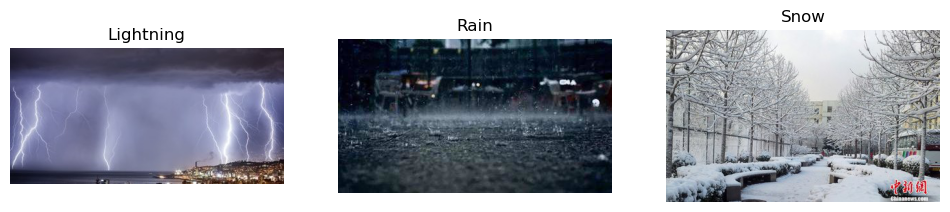

In [10]:
# Display sample images from each category
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(lightning_sample)
plt.title('Lightning')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rain_sample)
plt.title('Rain')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(snow_sample)
plt.title('Snow')
plt.axis('off')

plt.show()

In [11]:
# Plot distribution of image dimensions
widths = [image_shape[0] for _ in range(len(lightning_images))] + \
         [image_shape[0] for _ in range(len(rain_images))] + \
         [image_shape[0] for _ in range(len(snow_images))]
heights = [image_shape[1] for _ in range(len(lightning_images))] + \
          [image_shape[1] for _ in range(len(rain_images))] + \
          [image_shape[1] for _ in range(len(snow_images))]
categories = ['Lightning'] * len(lightning_images) + \
             ['Rain'] * len(rain_images) + \
             ['Snow'] * len(snow_images)

plt.figure(figsize=(10, 6))
sns.histplot(data=pd.DataFrame({'Category': categories, 'Width': widths, 'Height': heights}), x='Width', hue='Category', bins=20, kde=True)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=pd.DataFrame({'Category': categories, 'Width': widths, 'Height': heights}), x='Height', hue='Category', bins=20, kde=True)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')
plt.show()

In [2]:
from fastai.vision.all import *

# Define directories
lightning_dir = 'lightning'
rain_dir = 'rain'
snow_dir = 'snow'

# Define transformations for data augmentation and preprocessing
# Use Resize, RandomResizedCrop, Flip, Normalize, etc.
# Here's a basic example, you can customize it further
item_tfms = [Resize(224, method='squish')]
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]

# Create Fastai DataLoaders
dls = ImageDataLoaders.from_folder('.', train='.', valid_pct=0.2, 
                                   item_tfms=item_tfms, batch_tfms=batch_tfms)

# Define the CNN architecture
learn = cnn_learner(dls, resnet18, metrics=accuracy)

# Train the model
learn.fine_tune(5)  # Fine-tune for 5 epochs (you can adjust this value)

# Save the trained model
learn.export('trained_model.pkl')

/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
